# Group Lab Activity

### Group number: 

### Members of the group: (fill this in!!!)
  - Max K

In [ ]:
# import the packages 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

## Step one - Series

First, we want to create a `pandas` `Series` object that has length 3 and the first element is `nan` 

In [ ]:
s = pd.Series([np.nan,12.03, 43.1])

In [ ]:
s

0      NaN
1    12.03
2    43.10
dtype: float64

### Do a numerical operation on the Series

Multiply the series by the scalar 0.5

In [ ]:
s*0.5

0       NaN
1     6.015
2    21.550
dtype: float64

### Store the result in another series object

The result of the last operation wasn't stored in a variable, assign the operation to a variable called `s1`

In [ ]:
s1 = s*0.5

In [ ]:
s1

0       NaN
1     6.015
2    21.550
dtype: float64

In [ ]:
# We can also add these two series! 
s + s1

0       NaN
1    18.045
2    64.650
dtype: float64

## Creating DataFrames

In [ ]:
# by using a multiple series
df = pd.DataFrame( {'a':s,'b':s1})

In [ ]:
df

,a,b
0,NaN,NaN
1,12.03,6.015
2,43.10,21.550


In [ ]:
# by using a dict
d = {'a':[1,2,3],
     'b':[9,5,2]}

In [ ]:
df = pd.DataFrame(d)

In [ ]:
df

,a,b
0,1,9
1,2,5
2,3,2


In [ ]:
# checkout whats in memory right now just for fun
%whos

Variable   Type         Data/Info
---------------------------------
d          dict         n=2
df         DataFrame       a  b\n0  1  9\n1  2  5\n2  3  2
np         module       <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
pd         module       <module 'pandas' from '/u<...>ages/pandas/__init__.py'>
plt        module       <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
s          Series       0      NaN\n1    12.03\n2<...>    43.10\ndtype: float64
s1         Series       0       NaN\n1     6.015\<...>   21.550\ndtype: float64


In [ ]:
# now, let's load from a file
df = pd.read_csv('titanic.csv')

## Investigate the DataFrame

Now the titanic data is loaded into the variable `df`, what can we learn about it?

In [ ]:
# The first 5 rows
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# the last 5 rows
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# the column names and their types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
# the length of the dataframe
len(df)

891

## Slicing and Dicing

How to select rows and columns 

In [ ]:
# Select the 523 row (note ... the result is a Series with the indices represted by column names)
df.iloc[523]

PassengerId                                                524
Survived                                                     1
Pclass                                                       1
Name           Hippach, Mrs. Louis Albert (Ida Sophia Fischer)
Sex                                                     female
Age                                                       44.0
SibSp                                                        0
Parch                                                        1
Ticket                                                  111361
Fare                                                   57.9792
Cabin                                                      B18
Embarked                                                     C
Name: 523, dtype: object

In [ ]:
foo = df.iloc[523]

In [ ]:
# you can index the series using the classic dictionary-like syntax
foo['Name']

'Hippach, Mrs. Louis Albert (Ida Sophia Fischer)'

In [ ]:
# Select all the rows where the flag survived = 1
df_survivors = df[ df['Survived'] == 1 ]

In [ ]:
df_survivors.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
# Select all the rows where the flag survived = 1 AND the Sex is male
df_survivors_men = df[ (df['Survived'] == 1) & (df['Sex'] == 'male') ]

In [ ]:
df_survivors_men.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S


In [ ]:
# Just show the Name and Fare columns 
df_survivors_men[['Name','Fare']]

,Name,Fare
17,"Williams, Mr. Charles Eugene",13.0000
21,"Beesley, Mr. Lawrence",13.0000
23,"Sloper, Mr. William Thompson",35.5000
36,"Mamee, Mr. Hanna",7.2292
55,"Woolner, Mr. Hugh",35.5000
...,...,...
838,"Chip, Mr. Chang",56.4958
839,"Marechal, Mr. Pierre",29.7000
857,"Daly, Mr. Peter Denis",26.5500
869,"Johnson, Master. Harold Theodor",11.1333


In [ ]:
# I want all of the male survivors from class 2 or three
class_23 = df_survivors_men[df_survivors_men["Pclass"].isin([2, 3])]

In [ ]:
class_23.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S


In [ ]:
# I want to remove the records from class_23 that have the Age set as nan
age_no_na = class_23[class_23["Age"].notna()]

In [ ]:
age_no_na.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
21,22,1,2,"Beesley, Mr. Lawrence",male,34.00,0,0,248698,13.0000,D56,S
74,75,1,3,"Bing, Mr. Lee",male,32.00,0,0,1601,56.4958,NaN,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.00,0,0,345779,9.5000,NaN,S
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.00,1,0,2651,11.2417,NaN,C


## Groupby and Pivot Tables

Panda's DataFrame also allows for you to analyze data using a "groupby" function, which combines split, apply, and combine functions.  See the [O'Reilly Python for Data Science](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html#GroupBy:-Split,-Apply,-Combine) book for a great explanation. 

Pivot tables are multidimensional groupbys!  Read more [here](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html)

In [ ]:
# Group the original dataframe by survival, then sum the values in each partition 
df.groupby('Survived').sum()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,245412,1390,12985.50,304,181,12142.7199
1,151974,667,8219.67,162,159,16551.2294


In [ ]:
# That was great, but the sum of the column values doesn't really make any sense!
# What about finding the mean?
df.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [ ]:
# Averaging every column doesn't make sense, just pick out the Fare column
df.groupby('Survived')['Fare'].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

In [ ]:
# Now use groupby differently to determine the survival rate by sex
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [ ]:
# Pivot tables ... this was all great, but what if I want to find the 
# survival rate by sex AND by cabin class?  We use pivot tables:
df.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


## Visualization with Matplotlib

Let's make our very first (aww ❤️) information visualiztion!  How about a bar chart visualizing the
survival rate we just by sex and passenger class with matplotlib's bar function.  Note we add 
labels, and rotate the xticks to be more readable. 

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

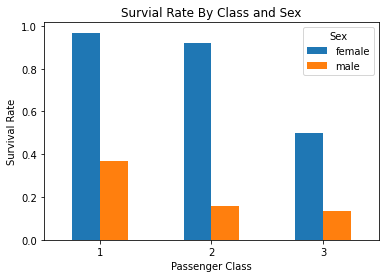

In [ ]:
df_sex_class_survival = df.pivot_table('Survived', index='Sex', columns='Pclass')
ax = df_sex_class_survival.T.plot(kind='bar')
plt.ylabel('Survival Rate')
plt.title('Survial Rate By Class and Sex')
plt.xlabel('Passenger Class')
plt.xticks(rotation=0)

### On your own now! 

Answer the next four questions as a group, and have one member of your group turn in this file (ipynb) as today's lab.  You will be graded for correctness, not just completion. 

## Q1 - What was the mean age of the male passengers in Pclass 1?

In [ ]:
df_pclass1_men = df[ (df['Pclass'] == 1) & (df['Sex'] == 'male') ]
mean_age = df_pclass1_men['Age'].mean()
mean_age

41.28138613861386

## Q2 - What was the mean Fare by Pclass?

In [ ]:
out = df.groupby('Pclass')['Fare'].mean()
out

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

## Q3 - How many females under the age of 13 were there?

In [ ]:
female_13 = df[ (df['Age'] < 13) & (df['Sex'] == 'female') ]
out = len(female_13)
out

32

## Q4 - Plot a histogram of the ages of all the passengers
Note - this is easier than the example above. See the documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hist.html). Use 20 equally spaced bins. You can control the plot with matplotlib's functions, like `grid`, `xlabel`, `ylabel`, and `title`

You are expected to label, use readable fonts, and do not plot grid lines. 

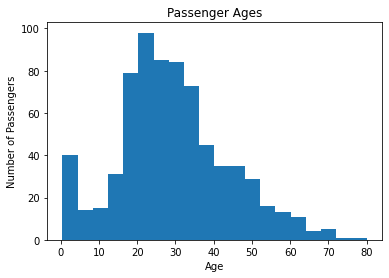

In [ ]:
df['Age'].plot.hist(bins=20)
plt.ylabel('Number of Passengers')
plt.title('Passenger Ages')
plt.xlabel('Age')
plt.grid(visible=False)